# Anatomy of a function
There are three parts of a function :
<br> Arguments
<br> Body
<br> Environment

Return value is the last executed expression, or the first executed return() statement

In [12]:
# Define ratio() function
ratio <- function(x, y = 1) {
  return(x/y) # body
}

In [13]:
# Call ratio() with arguments 3 and 4
ratio(3, 4)

[1] 0.75

In [14]:
formals(ratio)
body(ratio)
environment(ratio)

$x


$y
[1] 1


{
    return(x/y)
}

<environment: R_GlobalEnv>

**If you use return(value) - it forces the function to stop the execution and return the value**

In [7]:
# This is a non defined function
(function(x){ x +1 })(2)

[1] 3

In [9]:
f <- function(x) {
  if (TRUE) {
    return(x + 1)
  }
  x
}

In [11]:
f(2)

[1] 3

## For loops

A general way of creating an empty vector of given length is the vector() function. It has two arguments: the type of the vector ("logical", "integer", "double", "character", etc.) and the length of the vector.

In [17]:
a <- c(-0.2088114, 1.3014716, 1.3341206, -1.2580159, -1.0351962, 0.5480946, 0.7272566, 0.1163666, -0.9354584,
       -0.3030596)
b <- c(1.2869938, -0.8413037, -0.3034274, -0.3142811, 1.4168326, 2.1183197, 0.8453433, -0.6631015, 0.1074147,
       -0.1308820)
c <- c(1.1649836, 0.3881801, 0.2665318, 0.0724377, -2.2043632, 0.1702974, -0.5606962, 1.1636975, -1.2927012, 
       -1.0202577)
d <- c(0.7202029, -0.3845877, 0.2545252, -1.3385454, 1.1951161, 1.3390840, 1.2070076, -1.3177884, 0.3234719,
       -0.1027652)
df <- data.frame(a, b, c, d)
# Create new double vector: output which has the length of the dataframe 
output <- vector("double", length = ncol(df))
output

[1] 0 0 0 0

In [19]:
seq_along(df)

[1] 1 2 3 4

In [18]:
# A for loop which alters
for (i in seq_along(df)) {
  # Change code to store result in output
  output[[i]] <- median(df[[i]])
}

In [21]:
# Print output
print(output)
median(df$a)

[1] -0.04622240 -0.01173365  0.12136755  0.28899855


[1] -0.0462224

In [24]:
df[[1]]

[1] -0.2088114  1.3014716  1.3341206 -1.2580159 -1.0351962  0.5480946
 [7]  0.7272566  0.1163666 -0.9354584 -0.3030596

In [26]:
# Define example vector x
x <- 1:10 

# Use the function template to create the rescale01 function
rescale01 <- function(x) {
  # body
  rng <- range(x, na.rm = TRUE)
  (x - rng[1]) / (rng[2] - rng[1])
}

# Test your function, call rescale01 using the vector x as the argument
rescale01(x)

[1] 0.0000000 0.1111111 0.2222222 0.3333333 0.4444444 0.5555556 0.6666667
 [8] 0.7777778 0.8888889 1.0000000

## How to write a function
### Start with a simple problem
We want to write a function, both_na() that counts at how many positions two vectors, x and y, both have a missing value.

In [28]:
# Define example vectors x and y
x <- c( 1, 2, NA, 3, NA)
y <- c(NA, 3, NA, 3,  4)

# Count how many elements are missing in both x and y
sum(is.na(x) & is.na(y))

[1] 1

In [29]:
# Turn this snippet into a function: both_na()
both_na <- function(x, y) {
  sum(is.na(x) & is.na(y))
}

**Test the function**

In [32]:
# Define more test vectors x, y1 and y2
x <-  c(NA, NA, NA)
y1 <- c( 1, NA, NA)
y2 <- c( 1, NA, NA, NA)

# Call both_na on x, y1
both_na(x, y1)

# Call both_na on x, y2
both_na(x, y2)

[1] 2

Warning message in is.na(x) & is.na(y):
"Länge des längeren Objektes
 	 ist kein Vielfaches der Länge des kürzeren Objektes"

[1] 3

## How to write a good function
Functions name should be a verb and describe what they do
<br>Arguments name should be nouns and not common as c (already a function in R), also for data entry typical x, y, z

Arguments are often one of two types:

    Data arguments supply the data to compute on.
    Detail arguments control the details of how the computation is done.
Generally, data arguments should come first. Detail arguments should go on the end, and usually should have default values. 

### Return statements
This is a case where an early return() makes sense. If x is empty, the function should immediately return c(-Inf, Inf).

In [33]:
mean_ci <- function(x, level = 0.95) {
  if (length(x) == 0) {
    warning("`x` was empty", call. = FALSE)
    return(c(-Inf, Inf))
  }
  se <- sd(x) / sqrt(length(x))
  alpha <- 1 - level
  mean(x) + se * qnorm(c(alpha / 2, 1 - alpha / 2))
}

In [34]:
mean_ci(numeric(0))

Warning message:
"`x` was empty"

[1] -Inf  Inf

In [35]:
col_summary <- function(df, fun) {
  output <- vector("numeric", length(df))
  for (i in seq_along(df)) {
    output[[i]] <- fun(df[[i]])
  }
  output
}

In [36]:
col_summary(df, fun = median)

[1] -0.04622240 -0.01173365  0.12136755  0.28899855

# Purrr

The map functions

All the map functions in purrr take a vector, .x, as the first argument, then return .f applied to each element of .x. The type of object that is returned is determined by function suffix (the part after _):

    map() returns a list or data frame
    map_lgl() returns a logical vector
    map_int() returns a integer vector
    map_dbl() returns a double vector
    map_chr() returns a character vector


In [39]:
# Load the purrr package
library(purrr)

# Use map_dbl() to find column means
map_dbl(df, mean)

# Use map_dbl() to column medians
map_dbl(df, median)

# Use map_dbl() to find column standard deviations
map_dbl(df, sd)

a           b           c           d 
 0.02867685  0.35219084 -0.18518902  0.18957210

a           b           c           d 
-0.04622240 -0.01173365  0.12136755  0.28899855

a         b         c         d 
0.9412225 0.9995706 1.0806377 0.9828410

In [45]:
# Find the columns that are numeric
map_lgl(df, is.numeric)

# Find the type of each column
map_chr(df, typeof)

# Find a summary of each column
map(df, summary)

a    b    c    d 
TRUE TRUE TRUE TRUE

a        b        c        d 
"double" "double" "double" "double"

$a
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.25802 -0.77736 -0.04622  0.02868  0.68247  1.33412 

$b
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.84130 -0.31157 -0.01173  0.35219  1.17658  2.11832 

$c
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.2044 -0.9054  0.1214 -0.1852  0.3578  1.1650 

$d
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.3385 -0.3141  0.2890  0.1896  1.0764  1.3391 


n R, a one-sided formula starts with a ~, followed by an R expression. In purrr's map functions, the R expression can refer to an element of the .x argument using the . character.

In [57]:
# Formulars inside the map function
map_dbl(df, function(x) mean(x))

a           b           c           d 
 0.02867685  0.35219084 -0.18518902  0.18957210

In [59]:
# Formulars can be shortened in this way:
map_dbl(df, ~ mean(.))

a           b           c           d 
 0.02867685  0.35219084 -0.18518902  0.18957210

Using a string

There are also some useful shortcuts that come in handy when you want to subset each element of the .x argument. If the .f argument to a map function is set equal to a string, let's say "name", then purrr extracts the "name" element from every element of .x.

In [61]:
list_of_results <- list(
  list(a = 1, b = "A"), 
  list(a = 2, b = "C"), 
  list(a = 3, b = "D")
)

In [62]:
map(list_of_results, "a")

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] 3

Using a numeric vector

Another useful shortcut for subsetting is to pass a numeric vector as the .f argument. This works just like passing a string but subsets by index rather than name

In [63]:
map(list_of_results, 1)

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] 3

Putting it together with pipes

purrr also includes a pipe operator: %>%. The pipe operator is another shortcut that saves typing, but also increases readability. The explanation of the pipe operator is quite simple: x %>% f(y) is another way of writing f(x, y). That is, the left hand side of the pipe, x, becomes the first argument to the function, f(), on the right hand side of the pipe.

Creating a safe function

safely() is an adverb; it takes a verb and modifies it. That is, it takes a function as an argument and it returns a function as its output. The function that is returned is modified so it never throws an error (and never stops the rest of your computation!).

Instead, it always returns a list with two elements:

    result is the original result. If there was an error, this will be NULL.
    error is an error object. If the operation was successful this will be NULL.

In [65]:
# Create safe_readLines() by passing readLines() to safely()
safe_readLines <- safely(readLines)

# Call safe_readLines() on "http://example.org"
safe_readLines("http://example.org")

# Call safe_readLines() on "http://asdfasdasdkfjlda"
safe_readLines("http://asdfasdasdkfjlda")

$result
 [1] "<!doctype html>"                                                                                      
 [2] "<html>"                                                                                               
 [3] "<head>"                                                                                               
 [4] "    <title>Example Domain</title>"                                                                    
 [5] ""                                                                                                     
 [6] "    <meta charset=\"utf-8\" />"                                                                       
 [7] "    <meta http-equiv=\"Content-type\" content=\"text/html; charset=utf-8\" />"                        
 [8] "    <meta name=\"viewport\" content=\"width=device-width, initial-scale=1\" />"                       
 [9] "    <style type=\"text/css\">"                                                                        
[10] "    body {"                                                                                           
[11] "        background-color: #f0f0f2;"                                                                   
[12] "        margin: 0;"                                                                                   
[13] "        padding: 0;"                                                                                  
[14] "        font-family: \"Open Sans\", \"Helvetica Neue\", Helvetica, Arial, sans-serif;"                
[15] "        "                                                                                             
[16] "    }"                                                                                                
[17] "    div {"                                                                                            
[18] "        width: 600px;"                                                                                
[19] "        margin: 5em auto;"                                                                            
[20] "        padding: 50px;"                                                                               
[21] "        background-color: #fff;"                                                                      
[22] "        border-radius: 1em;"                                                                          
[23] "    }"                                                                                                
[24] "    a:link, a:visited {"                                                                              
[25] "        color: #38488f;"                                                                              
[26] "        text-decoration: none;"                                                                       
[27] "    }"                                                                                                
[28] "    @media (max-width: 700px) {"                                                                      
[29] "        body {"                                                                                       
[30] "            background-color: #fff;"                                                                  
[31] "        }"                                                                                            
[32] "        div {"                                                                                        
[33] "            width: auto;"                                                                             
[34] "            margin: 0 auto;"                                                                          
[35] "            border-radius: 0;"                                                                        
[36] "            padding: 1em;"                                                                            
[37] "        }"                                                    

Warning message in file(con, "r"):
"InternetOpenUrl fehlgeschlagen: 'The server name or address could not be resolved'"

$result
NULL

$error
<simpleError in file(con, "r"): kann Verbindung nicht öffnen>


In [66]:
# We are interested in quickly downloading the HTML files at each URL
urls <- list(
  example = "http://example.org",
  rproj = "http://www.r-project.org",
  asdf = "http://asdfasdasdkfjlda"
)
map(urls, readLines)

Warning message in file(con, "r"):
"InternetOpenUrl fehlgeschlagen: 'The server name or address could not be resolved'"

ERROR: Error in file(con, "r"): kann Verbindung nicht öffnen


In [67]:
# Use the safe_readLines() function with map(): html
html <- map(urls, safe_readLines) 

# Call str() on html
str(html)

# Extract the result from one of the successful elements
map(html, "result")

# Extract the error from the element that was unsuccessful
map(html, "error")

Warning message in file(con, "r"):
"InternetOpenUrl fehlgeschlagen: 'The server name or address could not be resolved'"

List of 3
 $ example:List of 2
  ..$ result: chr [1:50] "<!doctype html>" "<html>" "<head>" "    <title>Example Domain</title>" ...
  ..$ error : NULL
 $ rproj  :List of 2
  ..$ result: chr [1:122] "<!DOCTYPE html>" "<html lang=\"en\">" "  <head>" "    <meta charset=\"utf-8\">" ...
  ..$ error : NULL
 $ asdf   :List of 2
  ..$ result: NULL
  ..$ error :List of 2
  .. ..$ message: chr "kann Verbindung nicht öffnen"
  .. ..$ call   : language file(con, "r")
  .. ..- attr(*, "class")= chr [1:3] "simpleError" "error" "condition"


$example
 [1] "<!doctype html>"                                                                                      
 [2] "<html>"                                                                                               
 [3] "<head>"                                                                                               
 [4] "    <title>Example Domain</title>"                                                                    
 [5] ""                                                                                                     
 [6] "    <meta charset=\"utf-8\" />"                                                                       
 [7] "    <meta http-equiv=\"Content-type\" content=\"text/html; charset=utf-8\" />"                        
 [8] "    <meta name=\"viewport\" content=\"width=device-width, initial-scale=1\" />"                       
 [9] "    <style type=\"text/css\">"                                                                        
[10] "    body {"                                                                                           
[11] "        background-color: #f0f0f2;"                                                                   
[12] "        margin: 0;"                                                                                   
[13] "        padding: 0;"                                                                                  
[14] "        font-family: \"Open Sans\", \"Helvetica Neue\", Helvetica, Arial, sans-serif;"                
[15] "        "                                                                                             
[16] "    }"                                                                                                
[17] "    div {"                                                                                            
[18] "        width: 600px;"                                                                                
[19] "        margin: 5em auto;"                                                                            
[20] "        padding: 50px;"                                                                               
[21] "        background-color: #fff;"                                                                      
[22] "        border-radius: 1em;"                                                                          
[23] "    }"                                                                                                
[24] "    a:link, a:visited {"                                                                              
[25] "        color: #38488f;"                                                                              
[26] "        text-decoration: none;"                                                                       
[27] "    }"                                                                                                
[28] "    @media (max-width: 700px) {"                                                                      
[29] "        body {"                                                                                       
[30] "            background-color: #fff;"                                                                  
[31] "        }"                                                                                            
[32] "        div {"                                                                                        
[33] "            width: auto;"                                                                             
[34] "            margin: 0 auto;"                                                                          
[35] "            border-radius: 0;"                                                                        
[36] "            padding: 1em;"                                                                            
[37] "        }"                                                   

$example
NULL

$rproj
NULL

$asdf
<simpleError in file(con, "r"): kann Verbindung nicht öffnen>


purrr provides a function transpose() that reshapes a list so the inner-most level becomes the outer-most level. In otherwords, it turns a list-of-lists "inside-out".

In [68]:
nested_list <- list(
   x1 = list(a = 1, b = 2),
   x2 = list(a = 3, b = 4)
)

To extract the a element in x1, you could do:

In [70]:
nested_list[["x1"]][["a"]]

[1] 1

However, if you transpose the list first, the order of subsetting reverses. That is, to extract the same element I could also do .

In [72]:
transpose(nested_list)[["a"]][["x1"]]

[1] 1

In [74]:
safe_readLines <- safely(readLines)
html <- map(urls, safe_readLines)
res <- transpose(html)[["result"]]
errs <- transpose(html)[["error"]]

Warning message in file(con, "r"):
"InternetOpenUrl fehlgeschlagen: 'The server name or address could not be resolved'"

In [77]:
errs

$example
NULL

$rproj
NULL

$asdf
<simpleError in file(con, "r"): kann Verbindung nicht öffnen>


***Mapping over one variable***

In [78]:
# Create a list n containing the values: 5, 10, and 20
n <- list(5, 10, 20)

# Call map() on n with rnorm() to simulate three samples
map(n , rnorm)

[[1]]
[1]  0.3693168 -0.3850998 -0.9753076 -0.6255705  0.5840091

[[2]]
 [1]  0.1120591  0.2540400 -0.7540159 -1.3091003 -1.5162398 -1.2816644
 [7]  1.0936402 -0.6174788  1.0201583 -0.5642773

[[3]]
 [1]  0.46988881  1.49063116  0.08540753 -1.42033767 -0.37947596  0.95887449
 [7]  0.24061162 -0.62747770 -0.15877093 -1.37648809 -1.35151534  1.06367334
[13]  1.01658180  0.66578181  1.56429836 -1.21125234  2.45671515 -1.46895368
[19] -0.44057972  0.66963275

***Mapping over 2 variable***

In [80]:
# Create a list mu containing the values: 1, 5, and 10
mu <- list(1, 5, 10)

# Edit to call map2() on n and mu with rnorm() to simulate three samples
map2(n, mu, rnorm)

[[1]]
[1]  0.1437319  0.9950760 -0.1443393  1.5527521  2.0529271

[[2]]
 [1] 4.854198 6.157195 5.131245 6.527031 5.075041 4.880541 5.589915 6.148951
 [9] 7.306408 4.888003

[[3]]
 [1]  9.614816 11.187714  8.033413 10.073870  9.982954  7.985022  9.589317
 [8]  9.446155  8.596146  9.123048 10.655716  9.397763 10.117845 11.659846
[15] 10.021381  9.414668  8.550609  9.396524 10.147536 10.132375

***Mapping over more than two arguments***

In [82]:
# Create a sd list with the values: 0.1, 1 and 0.1
sd <- list(0.1, 1, 0.1)

# Edit this call to pmap() to iterate over the sd list as well
pmap(list(n, mu, sd), rnorm)

[[1]]
[1] 0.9718071 1.0510686 1.0033067 0.9425507 1.1559631

[[2]]
 [1] 5.161148 4.932947 3.086094 5.860621 5.338535 4.766327 3.363531 4.677647
 [9] 5.399074 3.966279

[[3]]
 [1] 10.075968  9.932212  9.902399  9.977115 10.094440  9.752842  9.838503
 [8] 10.170971 10.086088 10.077708  9.796269  9.924452 10.084925 10.005254
[15] 10.031920  9.976274  9.999787  9.946978  9.745953 10.131028

In [83]:
# Name the elements of the argument list
pmap(list(mean = mu,n = n, sd = sd), rnorm)

[[1]]
[1] 0.9769336 0.9890652 1.0314729 1.1945422 1.1173184

[[2]]
 [1] 3.325544 5.533741 4.432803 5.583435 4.300095 4.992058 3.537850 4.632574
 [9] 4.638952 4.539415

[[3]]
 [1]  9.907768  9.952735  9.800553 10.132784 10.100704  9.929739 10.003437
 [8]  9.960669  9.943872 10.005259 10.075001  9.994343  9.958315 10.072784
[15] 10.031154 10.047440 10.127869  9.746351 10.017124  9.875291

***Mapping over functions and their arguments***

In [85]:
# Define list of functions
f <- list("rnorm", "runif", "rexp")

# Parameter list for rnorm()
rnorm_params <- list(mean = 10)

# Add a min element with value 0 and max element with value 5
runif_params <- list(min = 0, max = 5)

# Add a rate element with value 5
rexp_params <- list(rate = 5)

# Define params for each function
params <- list(
  rnorm_params,
  runif_params,
  rexp_params
)

# Call invoke_map() on f supplying params as the second argument
invoke_map(f, params, n = 5)

[[1]]
[1] 10.795464  9.592880  9.196910  9.472779  9.561270

[[2]]
[1] 4.4916403410 1.1485965154 0.0001121045 4.9796065607 0.1903615950

[[3]]
[1] 0.0526753178 0.0298949877 0.0494544289 0.2319548190 0.0003790413

***walk***
<br>walk() operates just like map() except it's designed for functions that don't return anything. You use walk() for functions with side effects like printing, plotting or saving.

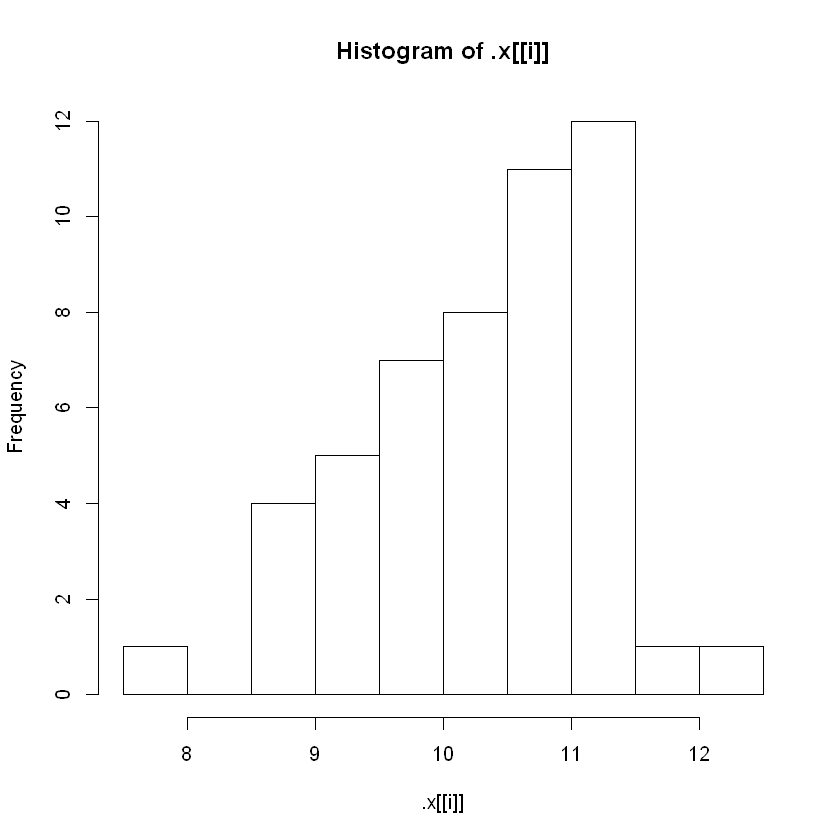

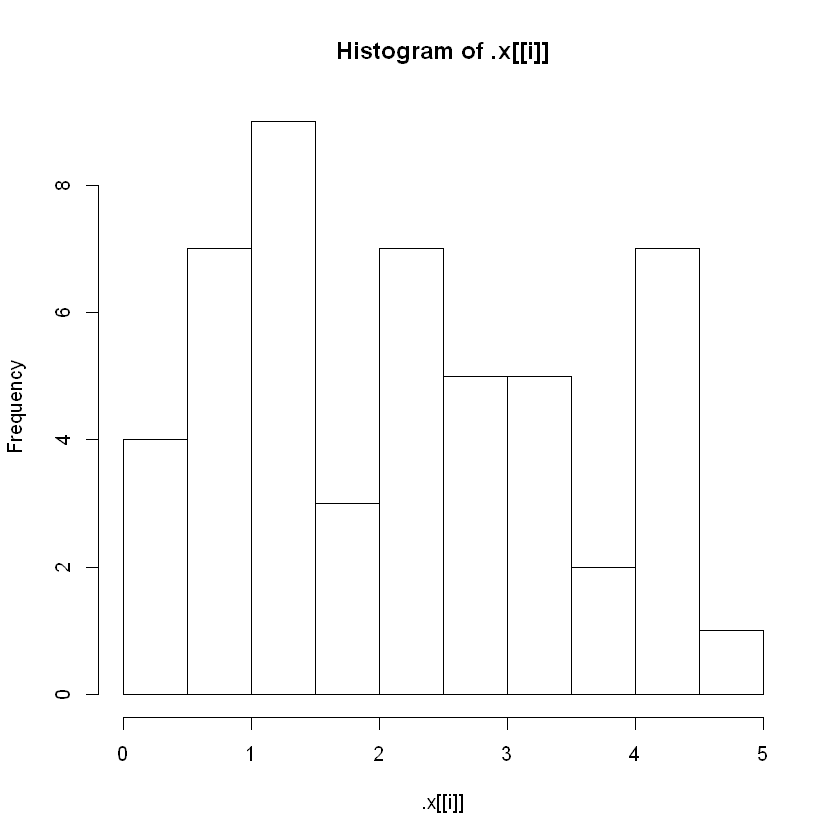

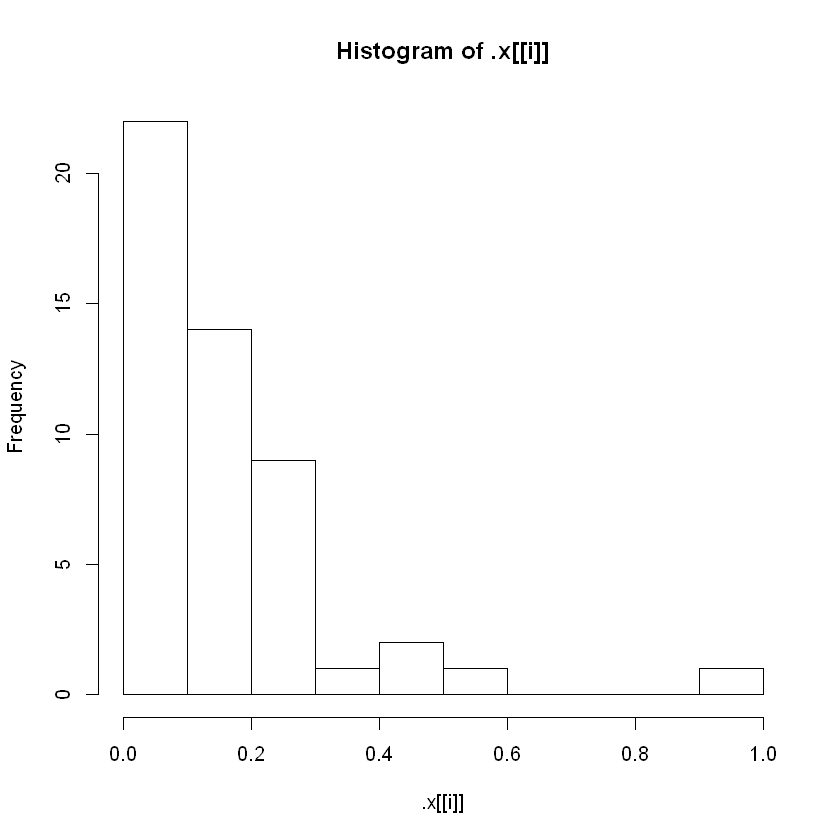

In [86]:
# Define list of functions
f <- list(Normal = "rnorm", Uniform = "runif", Exp = "rexp")

# Define params
params <- list(
  Normal = list(mean = 10),
  Uniform = list(min = 0, max = 5),
  Exp = list(rate = 5)
)

# Assign the simulated samples to sims
sims <- invoke_map(f, params, n = 50)

# Use walk() to make a histogram of each element in sims
walk(sims, hist)


Walking over two or more arguments

Those histograms were pretty good, but they really needed better breaks for the bins on the x-axis. That means we need to vary two arguments to hist(): x and breaks

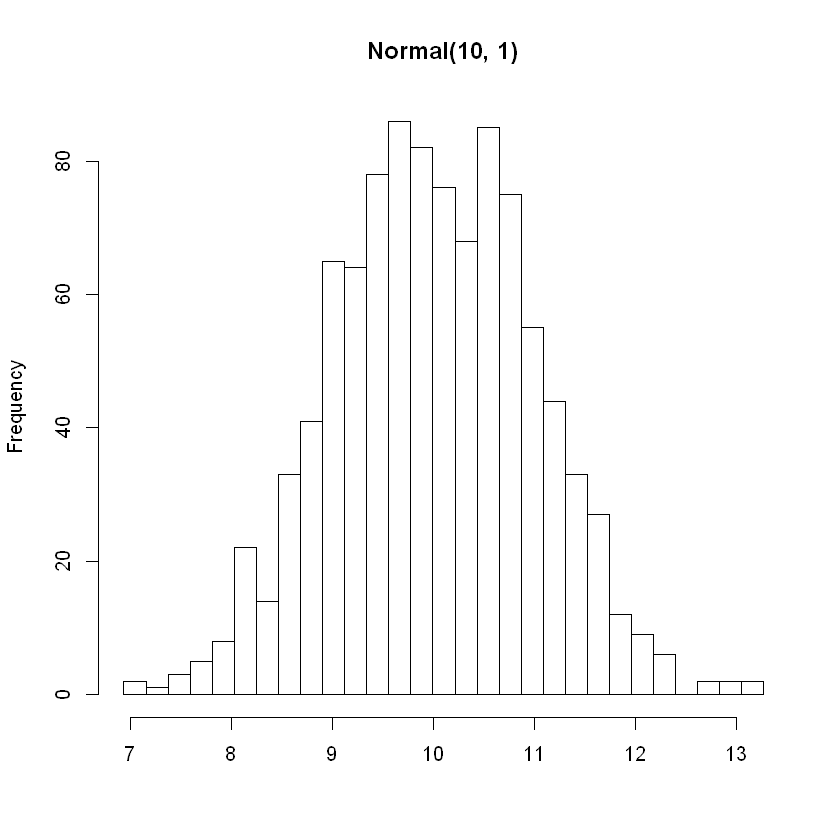

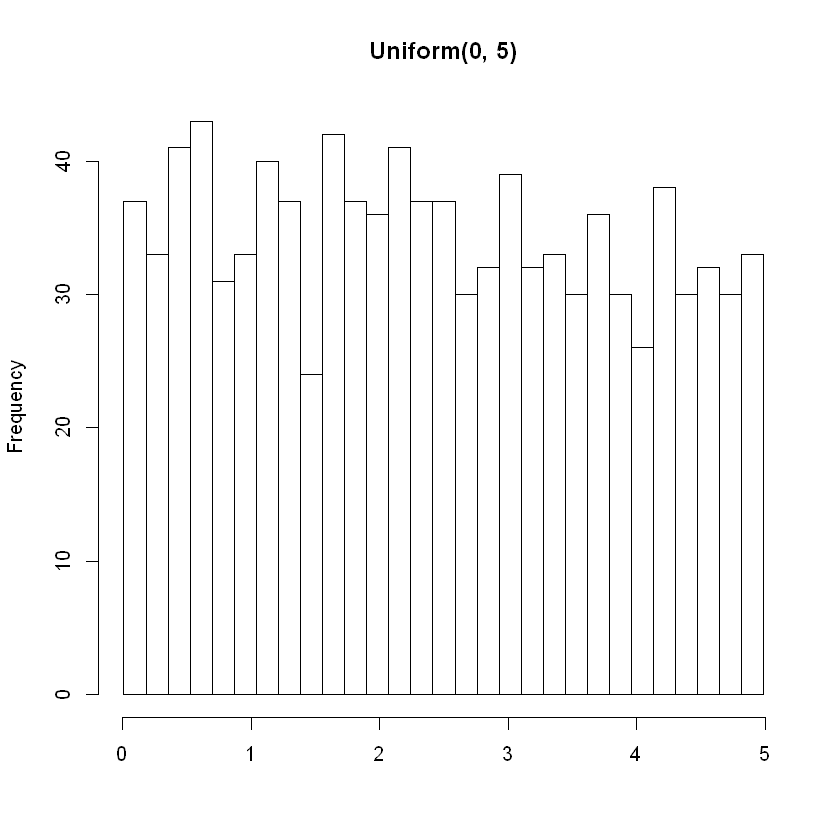

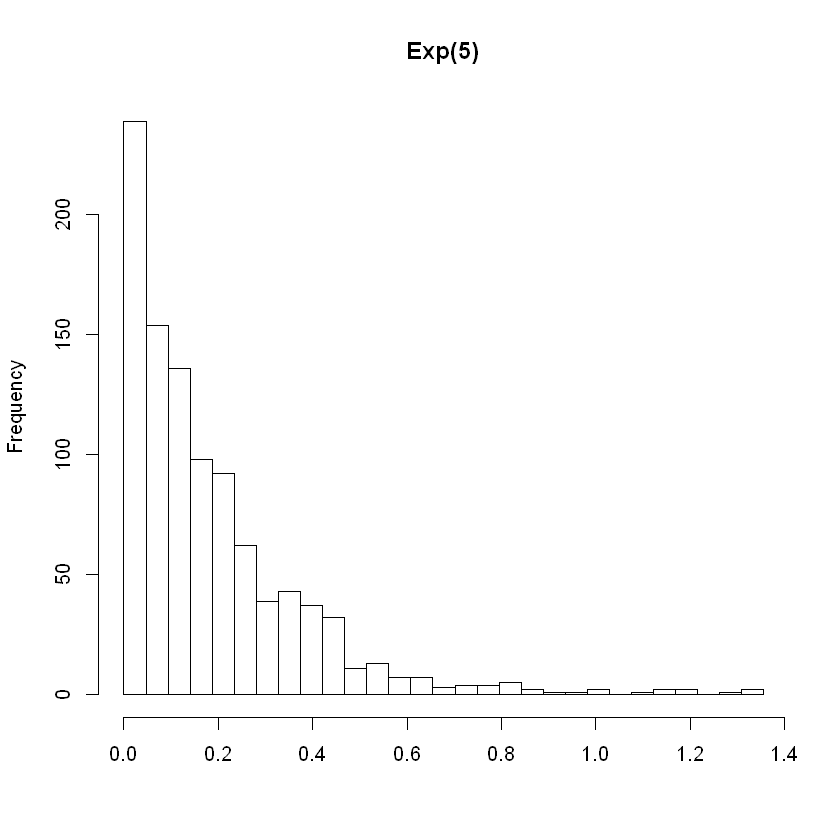

In [88]:
# Turn this snippet into find_breaks()
find_breaks <- function(x) {
  rng <- range(x, na.rm = TRUE)
  seq(rng[1], rng[2], length.out = 30)
}

# Increase sample size to 1000
sims <- invoke_map(f, params, n = 1000)

# Compute nice_breaks (don't change this)
nice_breaks <- map(sims, find_breaks)

# Create a vector nice_titles
nice_titles <- c("Normal(10, 1)", "Uniform(0, 5)", "Exp(5)")

# Use pwalk() instead of walk2()
pwalk(list(x = sims, breaks = nice_breaks, main = nice_titles), hist, xlab = "")